[ 0.5  +0.j    -0.354-0.354j  0.5  +0.j     0.354+0.354j]


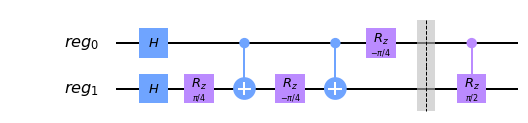

In [2]:
## Programming Quantum Computers
##   by Eric Johnston, Nic Harrigan and Mercedes Gimeno-Segovia
##   O'Reilly Media
##
## More samples like this can be found at http://oreilly-qc.github.io

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
## Uncomment the next line to see diagrams when running in a notebook
#%matplotlib inline

# Example 3-5: Custom conditional-phase
# Set up the program
reg = QuantumRegister(2, name='reg')
qc = QuantumCircuit(reg)

theta = math.pi / 2
qc.h(reg)
qc.rz(theta/2, reg[1])
qc.cx(reg[0], reg[1])
qc.rz(-theta/2, reg[1])
qc.cx(reg[0], reg[1])
qc.rz(-theta/2, reg[0])

qc.barrier()

qc.crz(theta, reg[0], reg[1])

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw(output='mpl',justify='all')   
        # draw the circuit
